In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set a random seed for reproducibility
np.random.seed(0)

# Define the centers for generating synthetic data
centers = [[-5, 0], [0, 1.5]]

# Generate synthetic data using make_blobs function
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)

# Apply a linear transformation to the data
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

# Add a bias term (1) to the feature matrix
X = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize coefficients for logistic regression
W = np.zeros(X.shape[1])

# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss (binary cross-entropy) function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    # Clip the predictions to avoid taking the log of 0 or 1
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient descent and Newton method parameters
learning_rate = 0.1  # Learning rate for gradient descent
iterations = 10     # Number of iterations for optimization
loss_history = []   # List to store loss values over iterations


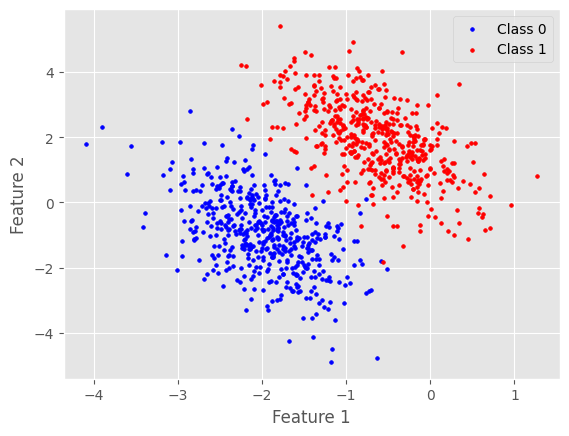

In [2]:
import matplotlib.pyplot as plt

# Separate the data into two arrays based on the labels (0 or 1)
X_class_0 = X[y == 0]
X_class_1 = X[y == 1]

# Create a scatter plot for each class with smaller points
plt.style.use('ggplot')
plt.scatter(X_class_0[:, 1], X_class_0[:, 2], label='Class 0', c='blue', s=7)
plt.scatter(X_class_1[:, 1], X_class_1[:, 2], label='Class 1', c='red', s=7)

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add a legend
plt.legend()

# Show the plot
plt.show()



In [3]:
#Shape of the Data
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
print("Shape of W: ", W.shape)

Shape of X:  (1000, 3)
Shape of y:  (1000,)
Shape of W:  (3,)


Batch Gradient weight update

In [4]:
# Define the learning rate and number of iterations
learning_rate = 0.1
iterations = 10
loss_history = []

N = X.shape[0]
ones_matrix = np.ones((N, 1))
ones_matrix_T = ones_matrix.T

# Reshape the weight vector W to (3, 1)
W = W.reshape(3, 1)

def update_w():
    global W
    global errors
    for j in range(N): # iterate over each data point
        linear_combination = np.dot(W.T, (X[j].reshape(3, 1)))
        error = sigmoid(linear_combination) - y[j]
        errors = np.append(errors, error)
    D = np.diag(errors)
    P1 = ones_matrix_T @ D
    P2 = P1 @ X
    P3 = P2.T
    W -= learning_rate * (1 / N) * P3

def calulate_loss():
    total_loss = 0
    for j in range(N):
        linear_combination = np.dot(W.T, (X[j].reshape(3, 1)))
        y_pred = sigmoid(linear_combination)
        loss = log_loss(y[j], y_pred)
        total_loss = total_loss + loss
    return total_loss

for t in range(iterations):
    errors = np.array([]) # empty array to store errors
    update_w()
    loss_history.append(calulate_loss())

print("Final Values of W after 10 iterations : ")
print('W0 : ', W[0][0])
print('W1 : ', W[1][0])
print('W2 : ', W[2][0])
print()

Final Values of W after 10 iterations : 
W0 :  0.009031764884538475
W1 :  0.262301155857097
W2 :  0.4994938404035172



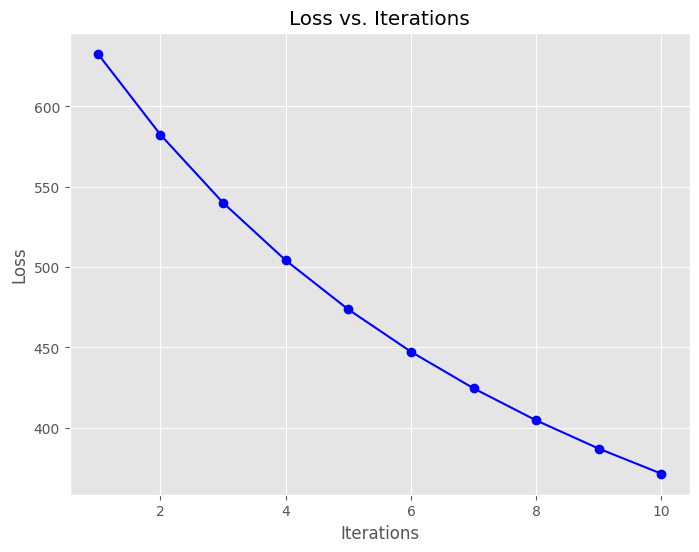

In [5]:
import matplotlib.pyplot as plt

# Reshape the loss history array
loss_history = np.reshape(loss_history, (iterations, 1))

# Create an array for the iteration numbers from 1 to 10
iteration_numbers = np.arange(1, iterations + 1)

# Plot the Loss vs. Iterations
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(iteration_numbers, loss_history, marker='o', linestyle='-',color='blue')
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [6]:
import numpy as np
from numpy.linalg import inv

learning_rate = 0.1
iterations = 10

loss_history_newton = []
N = X.shape[0]

W_newton = np.zeros(X.shape[1])
W_newton = W_newton.reshape(3, 1)

Mat_1N = np.ones((N, 1))
Mat_1N_T = Mat_1N.T

# Define a function to compute P1
def compute_P1(X, W, y):
    S_vect = np.array([])
    for i in range(N):
        temp3 = np.dot(W.T, (X[i].reshape(3, 1)))
        S_i = (sigmoid(temp3) - y[i]) * (1 - sigmoid(temp3) - y[i])
        S_vect = np.append(S_vect, S_i)
    S = np.diag(S_vect)
    P1 = np.dot(X.T, S)
    P1 = np.dot(P1, X)
    P1 = P1 / N
    return P1

# Define a function to compute P2
def compute_P2(X, W_newton, y):
    V = np.array([])
    for j in range(N):
        temp = np.dot(W_newton.T, (X[j].reshape(3, 1)))
        Mat_Error = sigmoid(temp) - y[j]
        V = np.append(V, Mat_Error)
    D = np.diag(V)
    P2 = np.dot(Mat_1N_T, D)
    P2 = np.dot(P2, X)
    P2 = P2.T
    P2 = P2 / N
    return P2

# Perform gradient descent
for t in range(iterations):
    P1 = compute_P1(X, W, y)
    P1_inverse = inv(P1)
    P2 = compute_P2(X, W_newton, y)

    # Update the weights using Newton's method
    W_newton = W_newton - np.dot(P1_inverse, P2)

    # Calculate the total loss for this iteration
    total_loss = 0
    for j in range(N):
        temp2 = np.dot(W_newton.T, (X[j].reshape(3, 1)))
        y_pred = sigmoid(temp2)
        loss = log_loss(y[j], y_pred)
        total_loss = total_loss + loss

    loss_history_newton.append(total_loss)

print("Final Values of W after 10 iterations (Newton's Method) ")
print("--------------------------------------------------------")
print('W0 : ', W_newton[0][0])
print('W1 : ', W_newton[1][0])
print('W2 : ', W_newton[2][0])
print()


Final Values of W after 10 iterations (Newton's Method) 
--------------------------------------------------------
W0 :  3.145757812061996
W1 :  2.9679207749775514
W2 :  1.4806766332837635



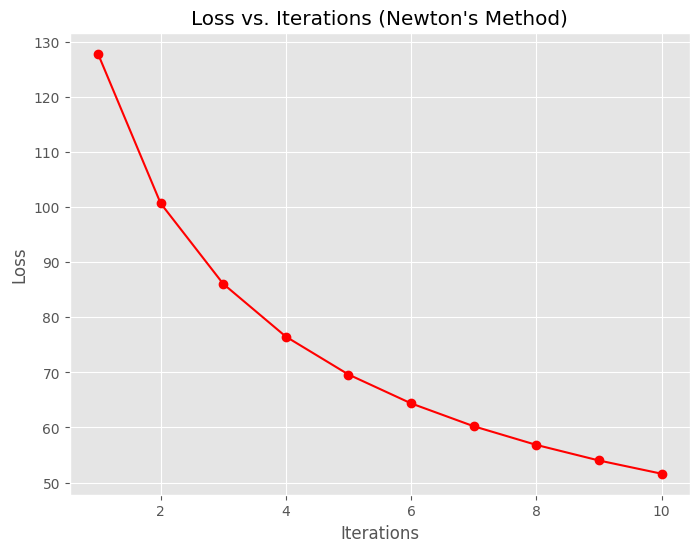

In [7]:
import matplotlib.pyplot as plt

# Plot the Loss vs. Iterations for Newton's method
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
iteration_numbers = np.arange(1, iterations + 1)
plt.plot(iteration_numbers, np.reshape(loss_history_newton, (iterations, 1)), marker='o', linestyle='-',color='red')
plt.title("Loss vs. Iterations (Newton's Method)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Plots

Batch gradient descent, RSS method using given formula and using newton method

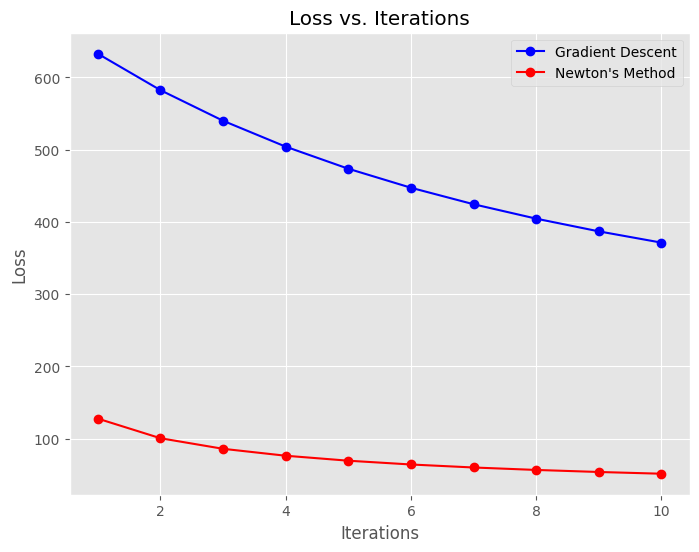

In [8]:
# Plot the Loss vs. Iterations for both methods
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
iteration_numbers = np.arange(1, iterations + 1)
plt.plot(iteration_numbers, loss_history, marker='o', linestyle='-', label='Gradient Descent',color='blue')
plt.plot(iteration_numbers, np.reshape(loss_history_newton, (iterations, 1)), marker='o', linestyle='-',color='red', label="Newton's Method")
plt.title("Loss vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Explaination


In [9]:
import pandas as pd
loss_history = np.reshape(loss_history, (iterations, 1))
loss_history_newton = np.reshape(loss_history_newton, (iterations, 1))
df = pd.DataFrame({'Iteration Number':range(1,11),'Gradient Descent': loss_history[:, 0], "Newton's Method": loss_history_newton[:, 0]})
df

,Iteration Number,Gradient Descent,Newton's Method
0,1,632.821152,127.859691
1,2,582.397295,100.717651
2,3,540.040023,86.078530
3,4,504.205110,76.502893
4,5,473.638953,69.620454
5,6,447.343296,64.379284
6,7,424.529851,60.226147
7,8,404.577017,56.837487
8,9,386.993210,54.009567
9,10,371.387546,51.606868


In [10]:
# Define the learning rate and number of iterations
W = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 1000
loss_history = []

N = X.shape[0]
ones_matrix = np.ones((N, 1))
ones_matrix_T = ones_matrix.T

# Reshape the weight vector W to (3, 1)
W = W.reshape(3, 1)

def update_w():
    global W
    global errors
    for j in range(N): # iterate over each data point
        linear_combination = np.dot(W.T, (X[j].reshape(3, 1)))
        error = sigmoid(linear_combination) - y[j]
        errors = np.append(errors, error)
    D = np.diag(errors)
    P1 = ones_matrix_T @ D
    P2 = P1 @ X
    P3 = P2.T
    W -= learning_rate * (1 / N) * P3

def calulate_loss():
    total_loss = 0
    for j in range(N):
        linear_combination = np.dot(W.T, (X[j].reshape(3, 1)))
        y_pred = sigmoid(linear_combination)
        loss = log_loss(y[j], y_pred)
        total_loss = total_loss + loss
    return total_loss

for t in range(iterations):
    errors = np.array([]) # empty array to store errors
    update_w()
    loss_history.append(calulate_loss())

loss_history = np.reshape(loss_history, (iterations, 1))
loss_history
           

array([[632.82115221],
       [582.39729496],
       [540.0400231 ],
       [504.20511024],
       [473.63895342],
       [447.34329598],
       [424.52985115],
       [404.57701695],
       [386.99321002],
       [371.38754603],
       [357.44706784],
       [344.91930273],
       [333.59896932],
       [323.31784591],
       [313.9370231 ],
       [305.3409492 ],
       [297.43282493],
       [290.13101746],
       [283.36624818],
       [277.07937159],
       [271.21960855],
       [265.74313127],
       [260.61192234],
       [255.79284882],
       [251.25690619],
       [246.97859725],
       [242.9354191 ],
       [239.10743697],
       [235.47692845],
       [232.02808493],
       [228.74676002],
       [225.62025637],
       [222.63714451],
       [219.78710809],
       [217.06081119],
       [214.44978418],
       [211.94632515],
       [209.54341446],
       [207.2346405 ],
       [205.01413493],
       [202.87651597],
       [200.81683876],
       [198.83055162],
       [196

In [11]:
loss_history[-5:-1, 0]

array([54.4748951 , 54.44939636, 54.42393473, 54.3985101 ])